<a href="https://colab.research.google.com/github/ahshawaf/AML/blob/project1/Project1_Alshawaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
#Required python version >= 3.5
import sys
assert sys.version_info >= (3,5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#to plot pretty figures
%matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

#where to save figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "project1"
PORJECT_DIR = os.path.join(PROJECT_ROOT_DIR,"projects",PROJECT_ID)
os.makedirs(PORJECT_DIR,exist_ok=True)

def save_fig(fig_id, tight_layout = True, fig_extension = 'png', resolution = 300):
  path = os.path.join(PORJECT_DIR,fig_id + "." + fig_extension)
  print("saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path,format = fig_extension,dpi = resolution)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action = "ignore",message = "^internal glad")


Using matplotlib backend: agg


# Get the data

In [0]:
import os
import tarfile
import urllib
import pandas as pd


HOST_ROOT = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/"
DATA_FILE = "wine.data"
DATA_URL = os.path.join(HOST_ROOT,DATA_FILE)

DATASET_PATH = os.path.join(PORJECT_DIR,"dataset")

def fetch_data(data_url = DATA_URL,dataset_path = DATASET_PATH):
  if not os.path.isdir(dataset_path):
    os.mkdir(dataset_path)
  data = pd.read_csv(data_url,header=None,index_col=False,
                     names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash',
                            'Magnesium','Total phenols','Flavanoids',
                            'Nonflavanoid phenols','Proanthocyanins',
                            'Color intensity','Hue','OD280/OD315 of diluted wines',
                            'Proline'])
  
  data.to_csv(os.path.join(dataset_path,"wineData.csv"))
  return data

In [186]:
fetch_data()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [0]:
def load_wine_data(dataset_path = DATASET_PATH):
  return fetch_data(DATA_URL,dataset_path)

In [0]:
wineData = load_wine_data()

In [191]:
wineData.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [192]:
wineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [199]:
wineData['Class'].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [200]:
wineData.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


saving figure pro1_att_hist_fig


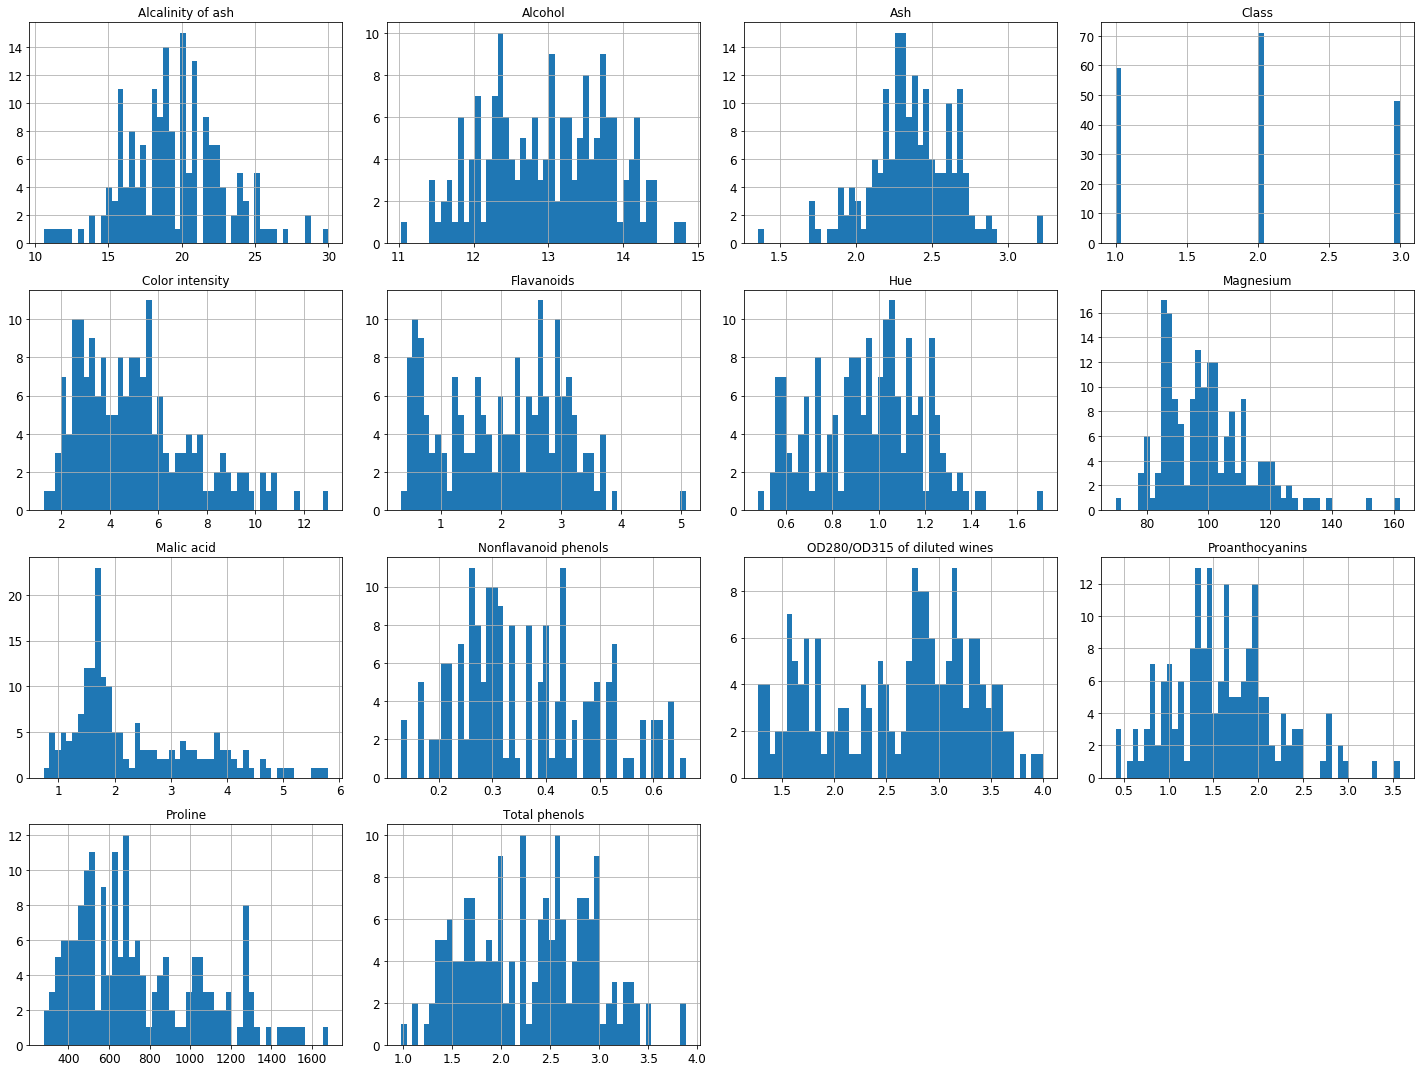

In [205]:
%matplotlib inline
import matplotlib.pyplot as plt
wineData.hist(bins=50,figsize=(20,15))
save_fig('pro1_att_hist_fig')
plt.show()

In [0]:
#to make this notebook's output identeical at every run
np.random.seed(85)

In [0]:
import numpy as np

def split_train_test(data,test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]


In [0]:
train_set, test_set=split_train_test(wineData,0.3)

In [212]:
len(train_set)

125

In [213]:
len(test_set)

53

In [0]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id: test_set_check(id_,test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

In [0]:
import hashlib

def test_set_check(identifier, test_ratio,has=hashlib.md5):
  return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [216]:
test_set.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wineData,test_size = 0.3, random_state = 85)

In [220]:
len(train_set)
test_set.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
71,2,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [219]:
len(test_set)

54

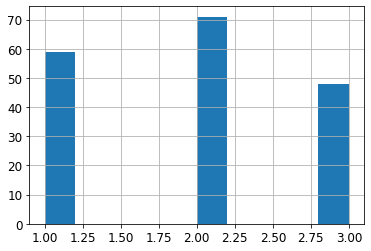

In [221]:
wineData['Class'].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=85)
for train_index, test_index in split.split(wineData, wineData['Class']):
    strat_train_set = wineData.loc[train_index]
    strat_test_set = wineData.loc[test_index]

In [223]:
strat_test_set['Class'].value_counts() / len(strat_test_set)

2    0.388889
1    0.333333
3    0.277778
Name: Class, dtype: float64

In [224]:
wineData['Class'].value_counts() / len(wineData)

2    0.398876
1    0.331461
3    0.269663
Name: Class, dtype: float64

In [0]:
def income_cat_proportions(data):
  return data['Class'].value_counts() / len(data)

train_set, test_set = train_test_split(wineData,test_size = 0.3, random_state = 85)

compare_props = pd.DataFrame({"Overall": income_cat_proportions(wineData),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [230]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.331461,0.333333,0.296296,-10.608914,0.564972
2,0.398876,0.388889,0.425926,6.781429,-2.503912
3,0.269663,0.277778,0.277778,3.009259,3.009259


# Discover and visualize the data to gain insights

In [0]:
wineData = strat_train_set.copy()

saving figure pro1_vis_plot


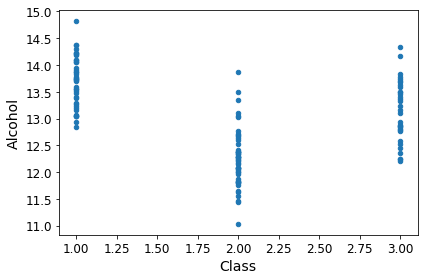

In [235]:
wineData.plot(kind="scatter",x="Class",y="Alcohol")
save_fig("pro1_vis_plot")

saving figure pro1_vis_plot


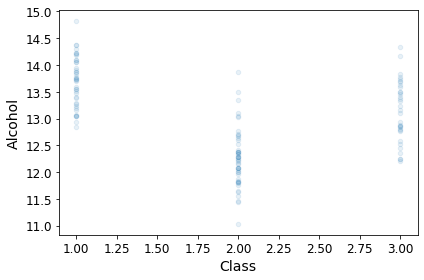

In [236]:
wineData.plot(kind="scatter",x="Class",y="Alcohol", alpha = 0.1)
save_fig("pro1_vis_plot")

saving figure pro1_vis_plot_colored


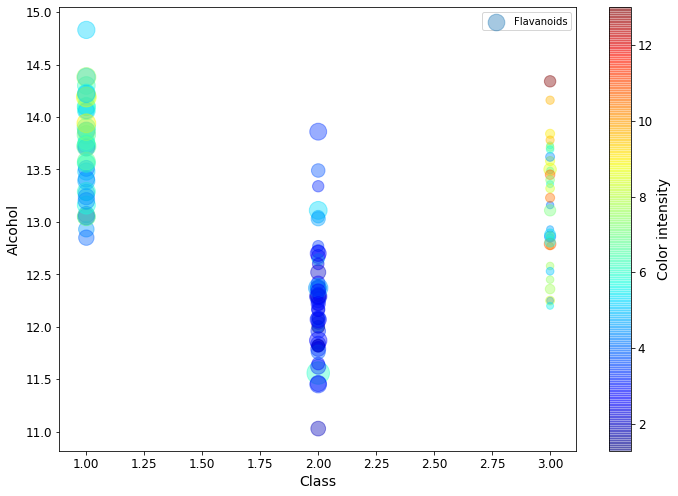

In [244]:
wineData.plot(kind="scatter",x="Class",y="Alcohol", alpha = 0.4,
              s = wineData['Flavanoids']* 100, label = "Flavanoids", figsize  =(10,7),
              c="Color intensity", cmap = plt.get_cmap("jet"), colorbar = True,
              sharex=False)
plt.legend()
save_fig("pro1_vis_plot_colored")

In [0]:
corr_matrix = wineData.corr()

In [246]:
corr_matrix['Class'].sort_values(ascending=False)

Class                           1.000000
Alcalinity of ash               0.527056
Nonflavanoid phenols            0.475977
Malic acid                      0.435581
Color intensity                 0.236165
Ash                            -0.031771
Magnesium                      -0.255977
Alcohol                        -0.309707
Proanthocyanins                -0.526602
Hue                            -0.599184
Proline                        -0.630643
Total phenols                  -0.736606
OD280/OD315 of diluted wines   -0.779889
Flavanoids                     -0.848710
Name: Class, dtype: float64

# **The highest corrrelation with the classification label, which is the Class, is the Alcalinity of ash**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f57e2fffbe0>,
      dtype=object)

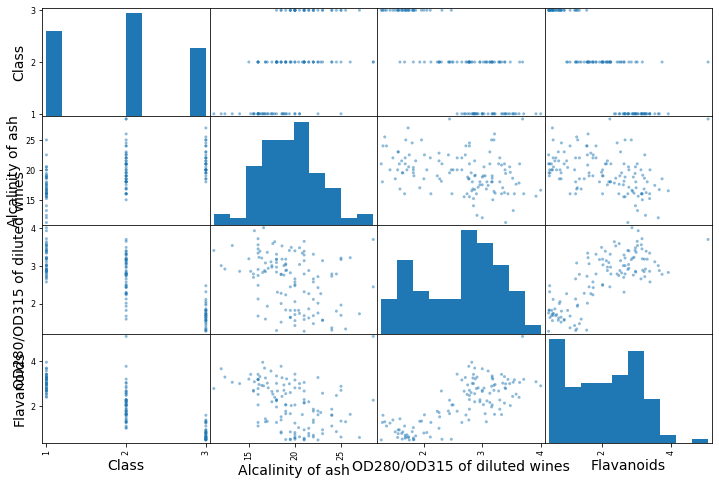

In [250]:
from pandas.plotting import scatter_matrix
attributes = ["Class","Alcalinity of ash","OD280/OD315 of diluted wines","Flavanoids"]
scatter_matrix(wineData[attributes],figsize=(12,8))

saving figure Flavanoids_vs_OD280_OD315OfDilutedWines_scatterplot


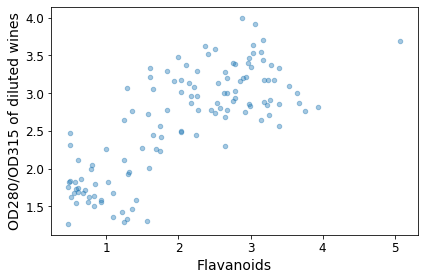

In [255]:
wineData.plot(kind="scatter", x="Flavanoids",y="OD280/OD315 of diluted wines",
              alpha=0.4)
save_fig("Flavanoids_vs_OD280_OD315OfDilutedWines_scatterplot")

In [256]:
wineData.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1.935484,12.971048,2.338871,2.365968,19.551613,99.225806,2.283387,2.048387,0.360806,1.607742,5.073065,0.957065,2.614113,738.685484
std,0.772936,0.812098,1.070025,0.275533,3.249252,13.033939,0.624774,1.014316,0.126989,0.573021,2.291704,0.231080,0.703448,318.358988
min,1.000000,11.030000,0.890000,1.700000,11.200000,78.000000,1.100000,0.470000,0.130000,0.410000,1.280000,0.480000,1.270000,290.000000
25%,1.000000,12.290000,1.610000,2.210000,17.325000,88.000000,1.700000,1.242500,0.260000,1.250000,3.240000,0.790000,1.952500,495.000000
50%,2.000000,13.040000,1.900000,2.360000,19.500000,98.000000,2.355000,2.125000,0.340000,1.560000,4.740000,0.965000,2.780000,655.000000
75%,3.000000,13.637500,3.052500,2.540000,21.500000,106.250000,2.835000,2.905000,0.450000,1.955000,6.212500,1.120000,3.170000,936.250000
max,3.000000,14.830000,5.650000,3.230000,28.500000,151.000000,3.520000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
wineData = strat_train_set.drop("Class",axis=1)#drop the labels
windData_labels = strat_train_set['Class'].copy()

In [259]:
sample_incomplete_rows = wineData[wineData.isnull().any(axis=1)].head()
sample_incomplete_rows

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [260]:
sample_incomplete_rows.dropna(subset=['Total phenols'])    # option 1

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [261]:
sample_incomplete_rows.drop("Total phenols", axis=1)       # option 2

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [262]:
median = wineData['Total phenols'].median()
sample_incomplete_rows['Total phenols'].fillna(median,inplace=True)

Series([], Name: Total phenols, dtype: float64)

In [263]:
sample_incomplete_rows

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [0]:
wine_num = wineData.select_dtypes(include=[np.number])

In [273]:
imputer.fit(wine_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [274]:
imputer.statistics_

array([1.304e+01, 1.900e+00, 2.360e+00, 1.950e+01, 9.800e+01, 2.355e+00,
       2.125e+00, 3.400e-01, 1.560e+00, 4.740e+00, 9.650e-01, 2.780e+00,
       6.550e+02])

In [275]:
wine_num.median().values

array([1.304e+01, 1.900e+00, 2.360e+00, 1.950e+01, 9.800e+01, 2.355e+00,
       2.125e+00, 3.400e-01, 1.560e+00, 4.740e+00, 9.650e-01, 2.780e+00,
       6.550e+02])

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),                   
])

wine_num_tr = num_pipeline.fit_transform(wine_num)

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(wine_num)


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs)
    ])

wine_prepared = full_pipeline.fit_transform(wineData)

# Select and train a model

In [291]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(wineData,windData_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [292]:
some_data = wineData.iloc[:5]
some_labels = windData_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [4.3738773  4.26326016 4.84714754 5.49978917 4.61771776]


In [293]:
print("Labels:", list(some_labels))

Labels: [2, 1, 3, 2, 3]


In [294]:
some_data_prepared

array([[ 1.09907611, -0.77777029,  1.10790864,  1.68361515, -1.01883716,
         1.07129446,  0.80340415, -1.19237412,  0.45953323, -0.7417767 ,
         1.75077978,  0.77916446, -1.03662504],
       [ 2.29835829, -0.65578491, -0.71411618, -1.71551313, -0.17146284,
         0.83023376,  0.92219045, -0.55984197,  0.65227718,  0.05561382,
         0.53416234,  0.33669021,  0.96607034],
       [ 0.64161796,  1.17399575, -0.64123518, -0.01594899, -0.8647691 ,
        -1.06611035, -1.55252423,  1.7330871 , -1.27516232,  0.27467716,
        -0.63900448, -1.13346616, -0.50047037],
       [-1.25003331, -1.17187689, -0.24038973,  0.4475685 ,  0.13667328,
         1.76233511,  0.09068632, -1.82490628,  0.07404533, -0.81625824,
         0.14310673,  0.73634437,  0.46460803],
       [-0.05075113,  0.44208348,  1.21723013,  0.4475685 , -0.24849687,
        -1.19467606, -1.53272651,  1.3377545 , -1.50295062, -0.20726217,
        -0.81280697, -0.43407138, -0.43739335]])

In [296]:
from sklearn.metrics import mean_squared_error

wine_pred = lin_reg.predict(wine_prepared)
lin_mse = mean_squared_error(windData_labels,wine_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.807299283326823

In [297]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(windData_labels,wine_pred)
lin_mae

2.74901140672252

In [298]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_prepared, windData_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [299]:
wine_predictions = tree_reg.predict(wine_prepared)
tree_mse = mean_squared_error(windData_labels, wine_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Fine-tune your model

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, wine_prepared, windData_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [301]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.         0.         0.39223227 0.2773501  0.         0.
 0.         0.28867513 0.         0.        ]
Mean: 0.09582575029837956
Standard deviation: 0.1490895099931884


In [302]:
lin_scores = cross_val_score(lin_reg, wine_prepared, windData_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.27848331 0.44422803 0.33701731 0.29669785 0.28467591 0.29419498
 0.24108962 0.29125509 0.15597196 0.18360374]
Mean: 0.2807217816418313
Standard deviation: 0.07552283143600014


In [303]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(wine_prepared, windData_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [304]:
wine_predictions = forest_reg.predict(wine_prepared)
forest_mse = mean_squared_error(windData_labels, wine_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.07002879592042488

In [305]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, wine_prepared, windData_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.21718478 0.26247344 0.20261749 0.23983969 0.19943671 0.31072496
 0.15861379 0.26642698 0.07702813 0.08220908]
Mean: 0.2016555048320381
Standard deviation: 0.0729022417907389


In [306]:
scores = cross_val_score(lin_reg, wine_prepared, windData_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.280722
std       0.079608
min       0.155972
25%       0.250438
50%       0.287966
75%       0.296072
max       0.444228
dtype: float64

In [307]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(wine_prepared, windData_labels)
wine_predictions = svm_reg.predict(wine_prepared)
svm_mse = mean_squared_error(windData_labels, wine_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.2529102832115409

In [308]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(wine_prepared, windData_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [309]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [310]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [311]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.23570226039551587 {'max_features': 2, 'n_estimators': 3}
0.2276693508870558 {'max_features': 2, 'n_estimators': 10}
0.21571672096456435 {'max_features': 2, 'n_estimators': 30}
0.32710854467592254 {'max_features': 4, 'n_estimators': 3}
0.2438647165950827 {'max_features': 4, 'n_estimators': 10}
0.2104210945628718 {'max_features': 4, 'n_estimators': 30}
0.25349410103444076 {'max_features': 6, 'n_estimators': 3}
0.2111239762161876 {'max_features': 6, 'n_estimators': 10}
0.1962132249101208 {'max_features': 6, 'n_estimators': 30}
0.2692238501349416 {'max_features': 8, 'n_estimators': 3}
0.2215250173983366 {'max_features': 8, 'n_estimators': 10}
0.21053459291720877 {'max_features': 8, 'n_estimators': 30}
0.24892360868941893 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.20855055342370427 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.2641548367487859 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.18840559085830405 {'bootstrap': False, 'max_features

In [312]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005199,0.000963,0.000843,0.000095,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.017778,-0.084444,-0.040000,-0.080000,-0.055556,-0.055556,0.024905,11,-0.017957,-0.022447,-0.020202,-0.025814,-0.027778,-0.022840,0.003583
1,0.012400,0.000233,0.001294,0.000020,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.025200,-0.068800,-0.057200,-0.058800,-0.049167,-0.051833,0.014708,10,-0.013333,-0.016465,-0.012323,-0.017576,-0.012300,-0.014399,0.002200
2,0.035174,0.001063,0.002307,0.000037,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.054267,-0.046311,-0.053556,-0.037378,-0.041157,-0.046534,0.006662,8,-0.007946,-0.007688,-0.006521,-0.009080,-0.010200,-0.008287,0.001256
3,0.004551,0.000233,0.000780,0.000022,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.053333,-0.048889,-0.235556,-0.044444,-0.152778,-0.107000,0.075885,18,-0.023569,-0.019080,-0.035915,-0.023569,-0.038889,-0.028204,0.007744
4,0.012545,0.000549,0.001365,0.000187,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.056800,-0.040400,-0.115600,-0.050800,-0.033750,-0.059470,0.029182,12,-0.011616,-0.010808,-0.017374,-0.014242,-0.014900,-0.013788,0.002362
5,0.035209,0.000594,0.002384,0.000054,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.053778,-0.037867,-0.062800,-0.051200,-0.015741,-0.044277,0.016351,5,-0.006117,-0.006869,-0.007654,-0.008541,-0.008489,-0.007534,0.000937
6,0.004657,0.000113,0.000822,0.000023,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.071111,-0.102222,-0.102222,-0.013333,-0.032407,-0.064259,0.036159,14,-0.014590,-0.016835,-0.026936,-0.019080,-0.020000,-0.019488,0.004170
7,0.012955,0.000294,0.001359,0.000071,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.083600,-0.062800,-0.040400,-0.014400,-0.021667,-0.044573,0.025721,7,-0.009293,-0.010202,-0.014040,-0.009697,-0.015100,-0.011666,0.002412
8,0.036084,0.000375,0.002422,0.000050,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.074044,-0.034222,-0.045156,-0.027733,-0.011343,-0.038500,0.020878,2,-0.008350,-0.007138,-0.006431,-0.005993,-0.007778,-0.007138,0.000859
9,0.004585,0.000069,0.000812,0.000019,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.048889,-0.097778,-0.133333,-0.022222,-0.060185,-0.072481,0.038927,17,-0.008979,-0.015713,-0.028058,-0.013468,-0.031111,-0.019466,0.008596


In [313]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(wine_prepared, windData_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [314]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.2080433290181908 {'max_features': 7, 'n_estimators': 180}
0.2184931560924947 {'max_features': 5, 'n_estimators': 15}
0.20084809253692246 {'max_features': 3, 'n_estimators': 72}
0.2056679842072926 {'max_features': 5, 'n_estimators': 21}
0.20677107516275842 {'max_features': 7, 'n_estimators': 122}
0.19975258770863596 {'max_features': 3, 'n_estimators': 75}
0.1990707795621499 {'max_features': 3, 'n_estimators': 88}
0.2030559036324726 {'max_features': 5, 'n_estimators': 100}
0.19983252247078562 {'max_features': 3, 'n_estimators': 150}
0.29325756597230357 {'max_features': 5, 'n_estimators': 2}


In [315]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.04493561, 0.04832794, 0.00410521, 0.00720327, 0.02547115,
       0.08695493, 0.39069518, 0.00800391, 0.07437718, 0.04923386,
       0.02312467, 0.11806208, 0.11950501])

In [0]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("Class", axis=1)
y_test = strat_test_set["Class"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [318]:
final_mse

0.030925925925925937

In [319]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.10357084, 0.22610823])

In [320]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(0.10357084371646301, 0.22610823112773198)

Alternatively, we could use a z-scores rather than t-scores:

In [321]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(0.10577320366413885, 0.22508638616868074)